In [127]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [262]:
os.listdir("../data")

['train_quality_data.csv',
 'train_problem_data.csv',
 'test_err_data.csv',
 'sample_submission.csv',
 'test_quality_data.csv',
 'train_err_data.csv']

In [90]:
trq =pd.read_csv('../data/train_quality_data.csv')
tsq =pd.read_csv('../data/test_quality_data.csv')
print(trq.shape,tsq.shape)

trq['data']=0
tsq['data']=1

total = pd.concat([trq,tsq])
total.shape
# columns 10,11,12 에 해당하는 데이터 에러 
# 

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (4,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(828624, 16) (747972, 16)


(1576596, 17)

In [91]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1576596 entries, 0 to 747971
Data columns (total 17 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   time        1576596 non-null  int64  
 1   user_id     1576596 non-null  int64  
 2   fwver       1513752 non-null  object 
 3   quality_0   1325580 non-null  float64
 4   quality_1   1576585 non-null  object 
 5   quality_2   1515368 non-null  float64
 6   quality_3   1576596 non-null  int64  
 7   quality_4   1576596 non-null  int64  
 8   quality_5   1576532 non-null  object 
 9   quality_6   1576596 non-null  int64  
 10  quality_7   1576596 non-null  object 
 11  quality_8   1576596 non-null  object 
 12  quality_9   1576596 non-null  object 
 13  quality_10  1576596 non-null  object 
 14  quality_11  1576596 non-null  int64  
 15  quality_12  1576596 non-null  int64  
 16  data        1576596 non-null  int64  
dtypes: float64(2), int64(8), object(7)
memory usage: 216.5+ MB


columns dtype에 따른분류

In [93]:
object_columns = total.select_dtypes(include=['object']).columns
numeric_columns = total.select_dtypes(include=['number']).columns
print("object_columns : ",list(object_columns))
print("numeric_columns : ",list(numeric_columns))

object_columns :  ['fwver', 'quality_1', 'quality_5', 'quality_7', 'quality_8', 'quality_9', 'quality_10']
numeric_columns :  ['time', 'user_id', 'quality_0', 'quality_2', 'quality_3', 'quality_4', 'quality_6', 'quality_11', 'quality_12', 'data']


object 데이터 중 '1,234'와 같은 1000의 자리 숫자를 표현한 데이터가 존재 이를 변환 후 데이터 타입 float형태로 수정

In [94]:
for column in object_columns:
    try:
        total[column] =total[column].str.replace(",","").astype("float")
    except:
        print(column , " error")

fwver  error


최종 column dtype 확인

In [95]:
object_columns = tq.select_dtypes(include=['object']).columns
numeric_columns = tq.select_dtypes(include=['number']).columns
print("object_columns : ",list(object_columns))
print("numeric_columns : ",list(numeric_columns))

object_columns :  ['fwver']
numeric_columns :  ['time', 'user_id', 'quality_0', 'quality_1', 'quality_2', 'quality_3', 'quality_4', 'quality_5', 'quality_6', 'quality_7', 'quality_8', 'quality_9', 'quality_10', 'quality_11', 'quality_12']


In [118]:
total.isnull().sum()

time                0
user_id             0
fwver           62844
quality_0      251016
quality_1     1543839
quality_2       61228
quality_3           0
quality_4           0
quality_5          64
quality_6           0
quality_7        9424
quality_8     1478292
quality_9      331412
quality_10          0
quality_11          0
quality_12          0
data                0
dtype: int64

## 결측치확인

<AxesSubplot:>

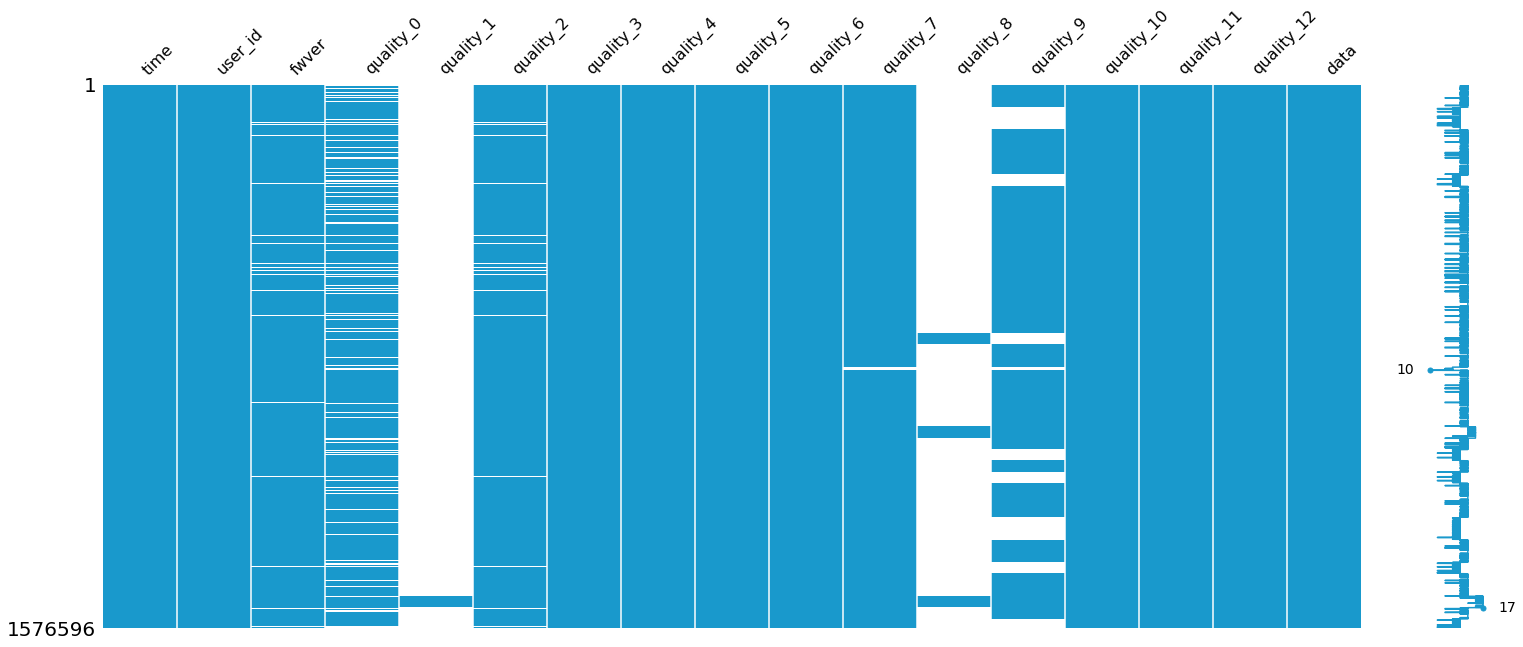

In [128]:
msno.matrix(df=total, color=(0.1, 0.6, 0.8))

절반을 기준으로 위쪽은 train , 아래쪽은 test 데이터이다    
quality_1의 변수의 경우 test 데이터에만 존재한다 -> 데이터 불균형으로 인한 크리티컬한 변수가 될 수 있음    
quality_8의 경우에도 test 데이터에만 조금더 많이 데이터가 존재하는 양상을 보인다.

## user_id

user_id의 train , test 셋의 갯수와 min ,max값을 확인

In [265]:
print("train user_id len : ",len(trq.user_id.unique()))
print("user_id min :",min(trq.user_id),"  max: ",max(trq.user_id))

print("test user_id len : ",len(tsq.user_id.unique()))
print("user_id min :",min(tsq.user_id),"  max: ",max(tsq.user_id))

train user_id len :  8281
user_id min : 10000   max:  24997
test user_id len :  8268
user_id min : 30000   max:  44997


각각의 user_id의 value_count

In [167]:
user_id_count = pd.merge(total.groupby('user_id').count()['time'].to_frame().reset_index(),total[['user_id','data']].drop_duplicates().reset_index(drop=True))
user_id_count.head()

,user_id,time,data
0,10000,24,0
1,10002,96,0
2,10004,24,0
3,10005,24,0
4,10006,36,0


In [176]:
user_id_count.loc[user_id_count.data ==0]['time'].describe().to_frame()

,time
count,8281.000000
mean,100.063277
std,269.316318
min,12.000000
25%,12.000000
50%,24.000000
75%,72.000000
max,4224.000000


In [175]:
user_id_count.loc[user_id_count.data ==1]['time'].describe().to_frame()

,time
count,8268.000000
mean,90.465893
std,222.273187
min,12.000000
25%,12.000000
50%,24.000000
75%,72.000000
max,3792.000000


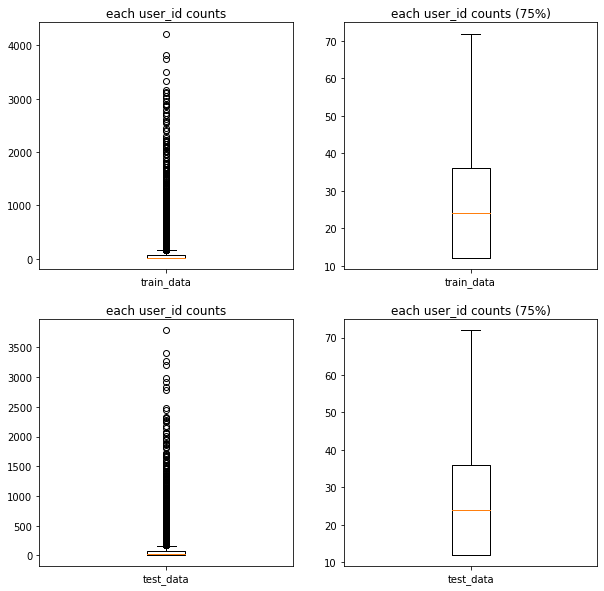

In [220]:
fig , axs  = plt.subplots(2,2,figsize=(10,10))

train_user_count =user_id_count.loc[user_id_count.data ==0]['time']
test_user_count =user_id_count.loc[user_id_count.data ==1]['time']

inxr = int(len(user_id_count.loc[user_id_count.data ==0]['time'])*0.75) 
usert75 = user_id_count.loc[user_id_count.data ==0]['time'].sort_values()[:inxr]

inxs = int(len(user_id_count.loc[user_id_count.data ==1]['time'])*0.75) 
users75 = user_id_count.loc[user_id_count.data ==1]['time'].sort_values()[:inxs]

axs[0,0].boxplot(train_user_count.values)
axs[0,0].set_xticklabels(['train_data'])
axs[0,0].set_title("each user_id counts")

axs[0,1].boxplot(usert75.values)
axs[0,1].set_xticklabels(['train_data'])
axs[0,1].set_title("each user_id counts (75%)")

axs[1,0].boxplot(test_user_count.values)
axs[1,0].set_xticklabels(['test_data'])
axs[1,0].set_title("each user_id counts")

axs[1,1].boxplot(users75.values)
axs[1,1].set_xticklabels(['test_data'])
axs[1,1].set_title("each user_id counts (75%)")
plt.show()

유저 아이디의 count 갯수 분포가 test, train 유사하다 ->  파생변수로 생성 가능

In [229]:
tct = train_user_count.to_frame()
tct['rest'] = tct['time']%12

tcs = test_user_count.to_frame()
tcs['rest'] = tcs['time']%12

len(tct.loc[tct['rest']!=0]) ,len(tcs.loc[tcs['rest']!=0])

(0, 0)

각 유저별 갯수가 12개씩 동일 -> 하루 로그 예상 (2시간 or 1시간 간격)

# TIME EDA

In [259]:
times= total.time.to_frame()
times['end4'] =times.time.astype("str").str[-4:]
times['end3'] =times.time.astype("str").str[-3:]
times['start4'] =times.time.astype("str").str[:4]
times['start5'] =times.time.astype("str").str[:5]
times['start7'] =times.time.astype("str").str[:7]
times['Len'] =times.time.astype('str').str.len()

print("time 길이가 14가 아닌 것의 갯수 : ",len(times.loc[times.Len !=14]))
print("time 마지막 3자리수가 000이 아닌 것의 갯수 : ",len(times.loc[times.end3 !='000']))
print("time 마지막 4자리수가 0000이 아닌 것의 갯수 : ",len(times.loc[times.end4 !='0000']))
print("time 처음 4자리수가 2020이 아닌 것의 갯수 : ",len(times.loc[times.start4 !='2020']))
print("time 처음 5자리수가 20201이 아닌 것의 갯수 : ",len(times.loc[times.start5 !='20201']))
print("time 처음 7자리수가 2020112이 아닌 것의 갯수 : ",len(times.loc[times.start7 !='2020112']))

time 길이가 14가 아닌 것의 갯수 :  0
time 마지막 3자리수가 000이 아닌 것의 갯수 :  0
time 마지막 4자리수가 0000이 아닌 것의 갯수 :  1292184
time 처음 4자리수가 2020이 아닌 것의 갯수 :  0
time 처음 5자리수가 20201이 아닌 것의 갯수 :  0
time 처음 7자리수가 2020112이 아닌 것의 갯수 :  1049076


시간데이터는 년도(4) + 월 (2) + 일자(2) + 시간(2) + 분(2) + 초(2) 예상 -> 아닐 가능성 배제 못함    

problem 데이터의 경우 

# object_columns(fwver) EDA

In [100]:
print("fwver lenths : ",len(total['fwver'].unique()))
total['fwver'].unique()

fwver lenths :  28


array(['05.15.2138', '04.22.1750', '04.16.3553', '04.33.1261',
       '04.22.1778', '04.33.1185', '04.16.3571', '05.66.3571',
       '03.11.1149', '03.11.1167', '04.82.1684', '04.82.1778',
       '04.33.1149', nan, '05.66.3237', '04.73.2237', '09.17.1431',
       '04.22.1684', '05.15.2120', '04.33.1125', '05.15.2122',
       '04.22.1666', '04.22.1656', '04.16.3439', '04.73.2571',
       '05.15.2114', '04.16.3345', '04.22.1442'], dtype=object)

In [107]:
print("fwver nan : ",len(total['fwver'].loc[total['fwver'].isnull()])," ,",round(len(total['fwver'].loc[total['fwver'].isnull()])/len(total)*100,2),"%")
print("fwver(train) nan : ",len(trq['fwver'].loc[trq['fwver'].isnull()])," ,",round(len(trq['fwver'].loc[trq['fwver'].isnull()])/len(trq)*100,2),"%")
print("fwver(test) nan : ",len(tsq['fwver'].loc[tsq['fwver'].isnull()])," ,",round(len(tsq['fwver'].loc[tsq['fwver'].isnull()])/len(tsq)*100,2),"%")

fwver nan :  62844  , 3.99 %
fwver(train) nan :  40080  , 4.84 %
fwver(test) nan :  22764  , 3.04 %


In [115]:
twver_nan=total.loc[total['fwver'].isnull()].reset_index(drop=True)

In [116]:
twver_nan

,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12,data
0,20201120010000,10693,NaN,NaN,NaN,NaN,0,0,0.0,0,0.0,NaN,0.0,0.0,0,0,0
1,20201120010000,10693,NaN,NaN,NaN,NaN,0,0,0.0,0,0.0,NaN,0.0,0.0,0,0,0
2,20201120010000,10693,NaN,NaN,NaN,NaN,0,0,0.0,0,0.0,NaN,0.0,0.0,0,0,0
3,20201120010000,10693,NaN,NaN,NaN,NaN,0,0,0.0,0,0.0,NaN,0.0,0.0,0,0,0
4,20201120010000,10693,NaN,NaN,NaN,NaN,0,0,0.0,0,0.0,NaN,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62839,20201111213000,44935,NaN,NaN,NaN,NaN,0,0,0.0,0,0.0,NaN,NaN,2.0,0,0,1
62840,20201111213000,44935,NaN,NaN,NaN,NaN,0,0,0.0,0,0.0,NaN,NaN,2.0,0,0,1
62841,20201111213000,44935,NaN,NaN,NaN,NaN,0,0,0.0,0,0.0,NaN,NaN,2.0,0,0,1
62842,20201111213000,44935,NaN,NaN,NaN,NaN,0,0,0.0,0,0.0,NaN,NaN,2.0,0,0,1
